In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import seaborn as sns

**mô tả dữ liệu**
tập dữ liệu liên quan đến các yếu tố marketing và doanh số bán hàng bao gồm 5 thông tin như sau:
1. TV: Mức đầu tư quảng cáo trên TV, được phân loại thành các mức như "Low", "Medium", và "High", đây là dữ liệu thứ tự.
2. Radio: Đầu tư quảng cáo trên đài phát thanh, có vẻ như được đo lường bằng dữ liệu liên tục.
3. Social Media: Đầu tư vào quảng cáo trên các nền tảng mạng xã hội, cũng được đo lường bằng dữ liệu liên tục.
4. Influencer: Loại người ảnh hưởng (influencer) được sử dụng trong chiến dịch, phân loại thành các mức như "Micro", "Macro", và "Mega", đây là dữ liệu danh mục.
5. Sales: Doanh số bán hàng, có thể là kết quả của các chiến dịch marketing, được đo lường bằng dữ liệu liên tục.

***đọc tập dữ liệu***

In [8]:
sl_data = pd.read_csv('data/marketing_sales_data.csv')

In [9]:
sl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            572 non-null    object 
 1   Radio         571 non-null    float64
 2   Social Media  573 non-null    object 
 3   Influencer    573 non-null    object 
 4   Sales         571 non-null    float64
dtypes: float64(2), object(3)
memory usage: 22.5+ KB


In [10]:
#Social Media là dữ liệu định lượng vì 1 lý do nào đó pandas đnag nhận diện nó là 'object' điều này ảnh hưởng đến việc đánh giá dữ liệu nên phải chuyển nó về kiểu dữ liệu liên tục 
sl_data['Social Media'] = pd.to_numeric(sl_data['Social Media'], errors='coerce')
print(sl_data.dtypes)

TV               object
Radio           float64
Social Media    float64
Influencer       object
Sales           float64
dtype: object


In [11]:
sl_data.head(5)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


In [12]:
sl_data.tail(5)

,TV,Radio,Social Media,Influencer,Sales
568,High,28.210738,4.373466,Micro,302.887998
569,Medium,23.578661,2.856657,Mega,232.555023
570,Low,9.169824,0.067279,Nano,73.888838
571,Low,11.563403,1.727947,Nano,121.949570
572,Medium,18.814801,3.440682,Mega,182.511614


In [13]:
sl_data.sample(5)

,TV,Radio,Social Media,Influencer,Sales
285,High,24.325473,3.671370,Nano,259.992715
350,Medium,24.234280,3.802225,Nano,172.796815
572,Medium,18.814801,3.440682,Mega,182.511614
14,Medium,22.150784,5.855267,Macro,200.401479
451,High,29.769755,2.856586,Macro,270.488154


In [14]:
#dữ liệu missing trước khi sử lý
sl_data.isnull().sum()

TV              1
Radio           2
Social Media    1
Influencer      0
Sales           2
dtype: int64

***khám phá dữ liệu***

In [16]:
#dữ liệu định lượng 
sl_data.describe()

,Radio,Social Media,Sales
count,571.000000,572.000000,571.000000
mean,18.623169,3.244097,193.809525
std,9.643559,2.199127,90.339649
min,0.194576,0.013230,31.199409
25%,10.878554,1.424252,118.814136
50%,18.744512,2.945318,200.090882
75%,25.743149,4.791290,268.567987
max,48.871161,11.260430,358.420739


In [17]:
#dữ liệu định tính
sl_data.describe(include='O')

,TV,Influencer
count,572,573
unique,3,4
top,Medium,Mega
freq,198,148


**thống kê mức đầu tư trên TV:**
1. Low
2. Medium
3. High

In [29]:
tv = sl_data['TV'].value_counts()
tv

TV
Medium    198
Low       197
High      177
Name: count, dtype: int64

In [31]:
# xây dựng hàm vẽ biểu đồ :
#xây dựng một số hàm vẽ biểu đồ:
#Hàm hiển thị text trên biểu đồ cột:
def label_bar(bar_plot,bar_label):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.005*height,
                bar_label[idx],
                ha='center', va='bottom', rotation=0)

#Hàm vẽ biểu đồ hình cột:
def plot_bar(r,h,p,x,y,c,t=0):
    plt.subplot(r,h,p)
    ax1 = plt.bar(x,y,color=c)
    label_bar(ax1,y)
    plt.xticks(x,
           rotation=t)
    plt.grid(ls='--')
    
#Hàm vẽ biểu đồ hình tròn:
def plot_pie(r,h,p,label,value,c):
    plt.subplot(r,h,p)
    plt.pie(value,
            labels=label,
            colors=c,
            startangle=90,
            labeldistance=1.1,
            pctdistance=0.6, 
            wedgeprops=dict(width=0.7,edgecolor='w'),
            autopct='%.2f %%')

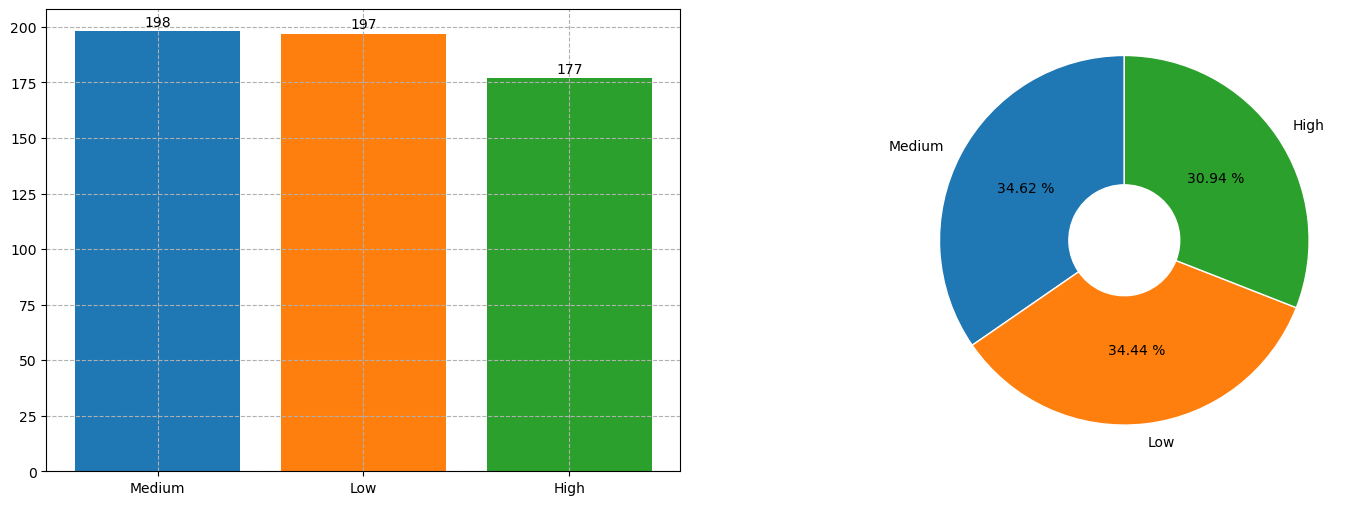

In [110]:
color1=sns.color_palette()
plt.figure(figsize=(18,6))

plot_bar(1,2,1,tv.index,tv.values,color1)
plot_pie(1,2,2,tv.index,tv.values,color1)

***nhận xét***
mức đầu tư quảng cáo trên tv khá đồng đều 

***đầu tư trên rdio***

In [37]:
sl_data['Radio'].describe()

count    571.000000
mean      18.623169
std        9.643559
min        0.194576
25%       10.878554
50%       18.744512
75%       25.743149
max       48.871161
Name: Radio, dtype: float64

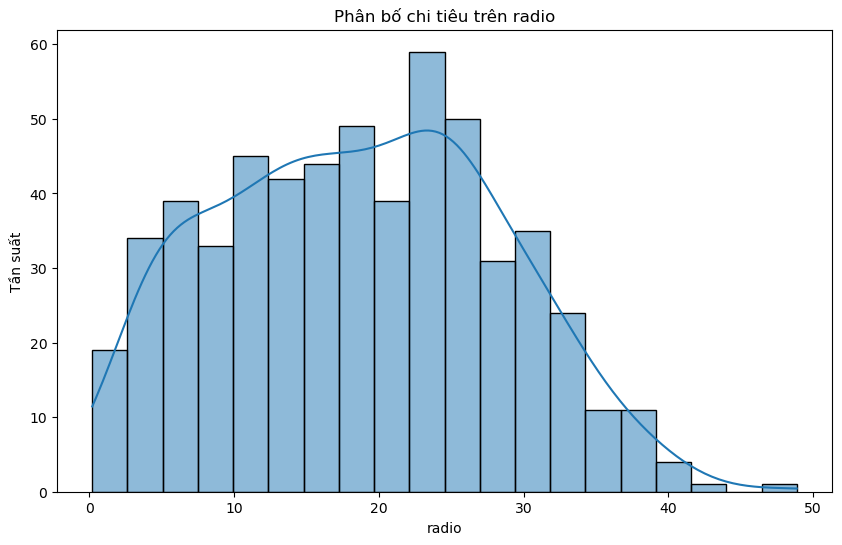

In [39]:
#Biểu đồ Histogram:
sl_data['Radio'] = pd.to_numeric(sl_data['Radio'], errors='coerce')

# Visualize the distribution of Social Media
plt.figure(figsize=(10, 6))
sns.histplot(sl_data['Radio'], bins=20, kde=True)
plt.title('Phân bố chi tiêu trên radio')
plt.xlabel('radio')
plt.ylabel('Tần suất')
plt.show()

**nhận xét**
Dữ liệu cho thấy rằng phần lớn chi phí quảng cáo trên radio nằm trong khoảng từ 10 đến 30. Điều này có thể cho thấy các công ty thường xuyên đầu tư một khoản ngân sách vừa phải cho quảng cáo trên radio, với mức đầu tư trung bình khoảng 18.62.

***đầu tư quảng cáo trên các nền tảng mạng xã hội***

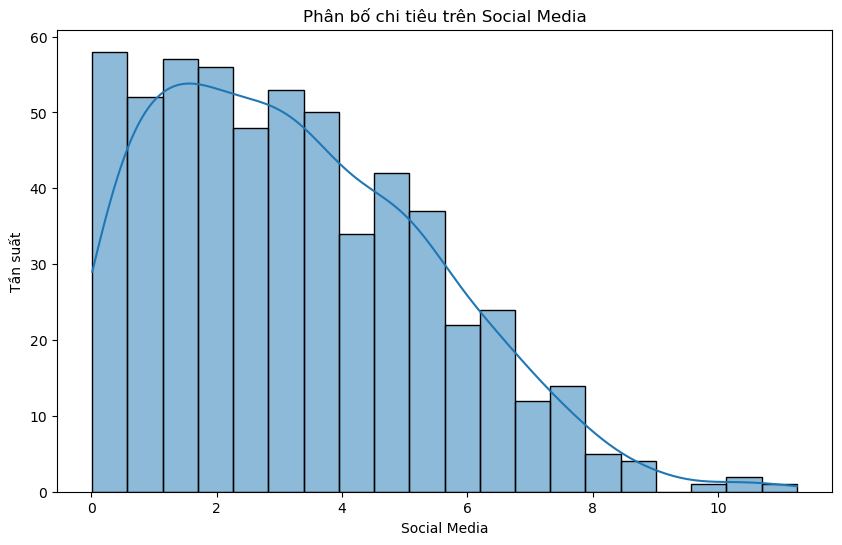

In [43]:
sl_data['Social Media'] = pd.to_numeric(sl_data['Social Media'], errors='coerce')

# Visualize the distribution of Social Media
plt.figure(figsize=(10, 6))
sns.histplot(sl_data['Social Media'], bins=20, kde=True)
plt.title('Phân bố chi tiêu trên Social Media')
plt.xlabel('Social Media')
plt.ylabel('Tần suất')
plt.show()

**nhận xét**
Phân bố của chi tiêu trên Social Media cho thấy rằng phần lớn các chiến dịch tập trung vào mức chi tiêu thấp, với đỉnh cao xuất hiện ở khoảng 1-2. Tuy nhiên, cũng có một số chiến dịch chi tiêu rất cao

***infuencer(loại người ảnh hưởng)***


In [47]:
ifn = sl_data['Influencer'].value_counts()
ifn

Influencer
Mega     148
Nano     148
Micro    145
Macro    132
Name: count, dtype: int64

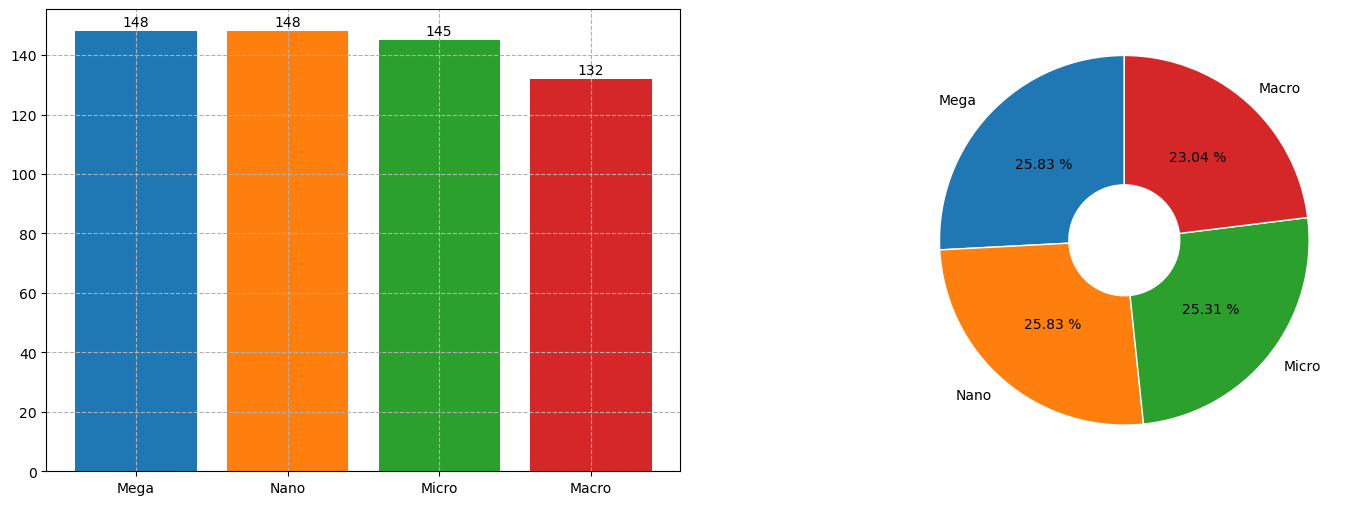

In [112]:
color1=sns.color_palette()
plt.figure(figsize=(18,6))
plot_bar(1,2,1,ifn.index,ifn.values,color1)
plot_pie(1,2,2,ifn.index,ifn.values,color1)

**nhận xét**
có thể thấy những người ảnh hưởng này được đầu tư khá đồng đều 

**chuẩn bị dữ liệu**

In [53]:
sl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            572 non-null    object 
 1   Radio         571 non-null    float64
 2   Social Media  572 non-null    float64
 3   Influencer    573 non-null    object 
 4   Sales         571 non-null    float64
dtypes: float64(3), object(2)
memory usage: 22.5+ KB


In [55]:
#vì dữ liệu missing khá là ít nên ta xóa luôn 
df_dropped = sl_data.dropna()

In [57]:
#hiển thị dữ liệu sau khi sử lý missing
print(df_dropped.isnull().sum())

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64


In [59]:
#sử lý dữ liệu trùng lặp
sl_data.duplicated().sum()

1

In [61]:
df_cleaned = sl_data.drop_duplicates()

In [63]:
print(df_cleaned.duplicated().sum())

0


**doanh số**

In [66]:
sl_data['Sales'].describe()

count    571.000000
mean     193.809525
std       90.339649
min       31.199409
25%      118.814136
50%      200.090882
75%      268.567987
max      358.420739
Name: Sales, dtype: float64

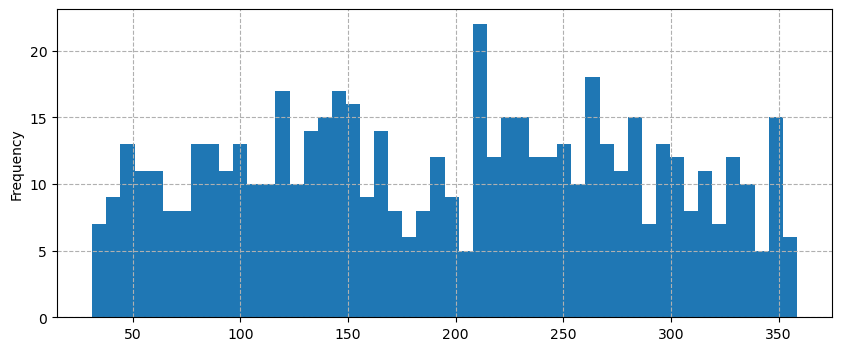

In [68]:
plt.figure(figsize=(10,4))
sl_data['Sales'].plot(kind='hist', bins=50)
plt.grid(ls='--')
plt.show()

**xây dựng mô hình và đánh giá kết luận**

**radio và sale**

In [119]:
sl_data.dropna(subset=['Radio', 'Sales'], inplace=True)

In [121]:
X = sl_data['Radio']
y = sl_data['Sales']

In [127]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     1755.
Date:                Sat, 31 Aug 2024   Prob (F-statistic):          1.47e-175
Time:                        15:35:24   Log-Likelihood:                -2962.7
No. Observations:                 568   AIC:                             5929.
Df Residuals:                     566   BIC:                             5938.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.7542      4.087     10.217      0.0

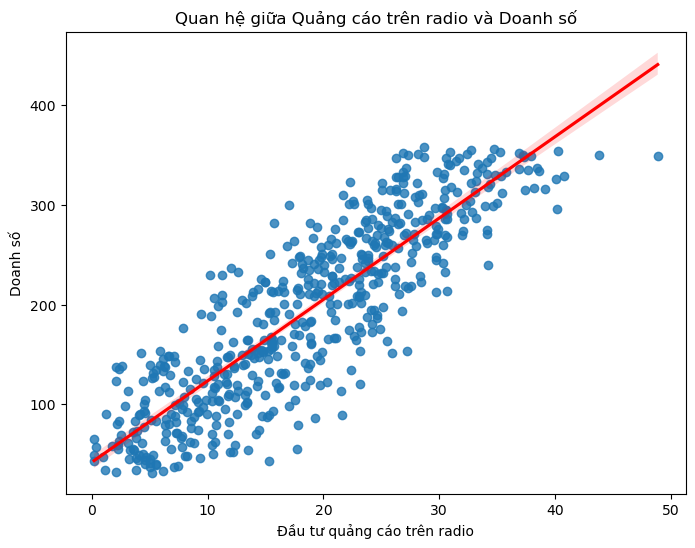

In [129]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Radio', y='Sales', data=sl_data, line_kws={"color": "red"})
plt.xlabel('Đầu tư quảng cáo trên radio')
plt.ylabel('Doanh số')
plt.title('Quan hệ giữa Quảng cáo trên radio và Doanh số')
plt.show()

**nhận xét**
1. radio: 8.1673 Đây là hệ số hồi quy cho biến Radio. Hệ số này có nghĩa là khi đầu tư quảng cáo trên đài phát thanh (Radio) tăng thêm 1 đơn vị, doanh số dự kiến sẽ tăng thêm khoảng 8.1673 đơn vị, với điều kiện các yếu tố khác không thay đổi. Giá trị p rất nhỏ (0.000), cho thấy hệ số này có ý nghĩa thống kê cao.
2. Radio có ảnh hưởng lớn đến doanh số: Hệ số hồi quy của biến Radio là 8.1673 với giá trị p rất nhỏ, cho thấy rằng đầu tư vào quảng cáo trên đài phát thanh có mối liên hệ mạnh mẽ và có ý nghĩa thống kê với doanh số.
3. Mô hình có độ phù hợp cao: Với R-squared = 0.756, mô hình này giải thích được 75.6% biến động của doanh số, điều này cho thấy mô hình có độ phù hợp cao và đầu tư vào quảng cáo trên đài phát thanh đóng góp lớn vào doanh số.
4. Không có vấn đề lớn về giả định của mô hình hồi quy: Không có tự tương quan phần dư và phần dư không có sự lệch chuẩn rõ rệt.

**socaial media và sale**

In [95]:
sl_data.dropna(subset=['Social Media', 'Sales'], inplace=True)

In [97]:
X = sl_data['Social Media']
y = sl_data['Sales']

In [99]:
X = sm.add_constant(X)

In [101]:
model = sm.OLS(y, X).fit()

In [103]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     218.4
Date:                Sat, 31 Aug 2024   Prob (F-statistic):           4.78e-42
Time:                        15:21:56   Log-Likelihood:                -3283.0
No. Observations:                 570   AIC:                             6570.
Df Residuals:                     568   BIC:                             6579.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          123.5000      5.750     21.480   

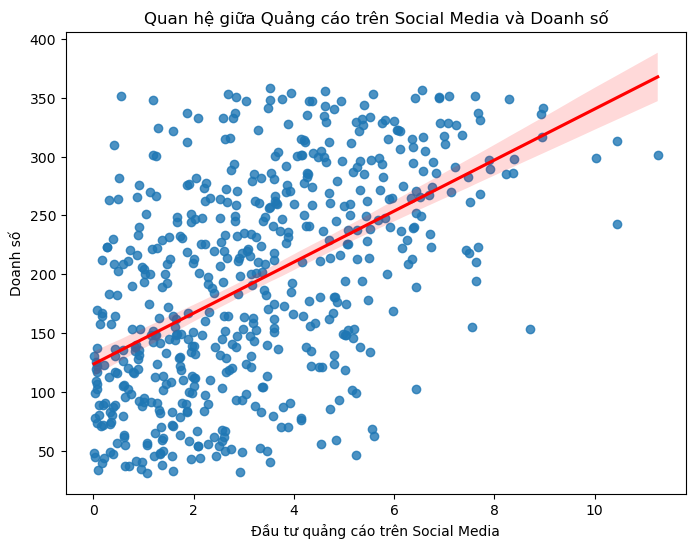

In [107]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Social Media', y='Sales', data=sl_data, line_kws={"color": "red"})
plt.xlabel('Đầu tư quảng cáo trên Social Media')
plt.ylabel('Doanh số')
plt.title('Quan hệ giữa Quảng cáo trên Social Media và Doanh số')
plt.show()

**nhận xét**
1. ta thấy Social Media có giá trị 21.6864 điểu này cho thấy khi đầu tư trên social media tenag thêm 1 đơn vị doanh số trung bình tăng lên thêm khoảng 21.6854 đơn vị
2. Social Media có ảnh hưởng đáng kể đến doanh số: Hệ số hồi quy dương và có ý nghĩa thống kê, nghĩa là đầu tư vào quảng cáo trên mạng xã hội làm tăng doanh số bán hàng.
3. Mức độ giải thích của mô hình là trung bình: Với R² = 0.278, mô hình giải thích được khoảng 27.8% biến động của doanh số, cho thấy rằng có nhiều yếu tố khác ngoài quảng cáo trên mạng xã hội có thể ảnh hưởng đến doanh số.
4. Cần xem xét thêm các biến khác: Để cải thiện mô hình và giải thích được nhiều hơn sự biến động của doanh số, bạn có thể cần thêm các biến khác như đầu tư quảng cáo trên TV, Radio, và loại Influencer sử dụng.

**đánh giá việc đầu tư ảnh hưởng tới doanh số**

       TV      Radio  Social Media Influencer       Sales
0     Low   1.218354      1.270444      Micro   90.054222
1  Medium  14.949791      0.274451      Macro  222.741668
2     Low  10.377258      0.061984       Mega  102.774790
3    High  26.469274      7.070945      Micro  328.239378
4    High  36.876302      7.618605       Mega  351.807328


<Figure size 1000x800 with 0 Axes>

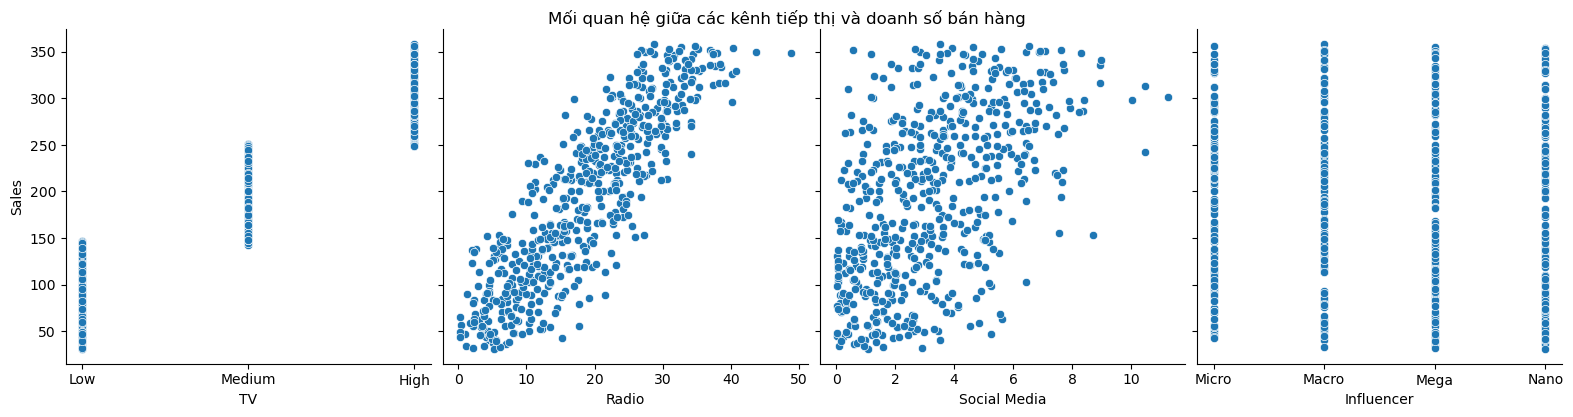

In [73]:
print(sl_data.head())
#Tạo trực quan hóa để thấy mối quan hệ giữa các thuộc tính và Sales
plt.figure(figsize=(10, 8))
sns.pairplot(sl_data, x_vars=['TV', 'Radio', 'Social Media', 'Influencer'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.suptitle('Mối quan hệ giữa các kênh tiếp thị và doanh số bán hàng', y=1.02)
plt.show()

**nhận xét:**
Từ hình ảnh trực quan bạn đã cung cấp, có thể nhận thấy mối quan hệ giữa các kênh tiếp thị và doanh số bán hàng (Sales) như sau:
+ TV: Mối quan hệ giữa TV và doanh số không rõ ràng. Có thể thấy rằng các mức ngân sách cho TV (Low, Medium, High) không có mối liên hệ chặt chẽ với doanh số, vì có sự phân tán dữ liệu lớn. Điều này cho thấy việc chi tiêu vào TV không đảm bảo chắc chắn sẽ tăng doanh số.
+ Radio: Có một mối quan hệ rõ ràng và tích cực giữa chi tiêu vào Radio và doanh số bán hàng. Khi chi tiêu vào Radio tăng lên, doanh số cũng có xu hướng tăng. Điều này gợi ý rằng Radio có ảnh hưởng tốt đến doanh số và có thể xem xét việc tăng ngân sách cho kênh này nếu muốn tăng doanh số.
+ Social Media: Cũng có một mối quan hệ tích cực giữa chi tiêu vào Social Media và doanh số. Khi chi tiêu vào Social Media tăng, doanh số cũng tăng lên. Tuy nhiên, mức độ ảnh hưởng dường như không mạnh như Radio, nhưng vẫn là một kênh có tiềm năng.
+ Influencer: Mối quan hệ giữa Influencer và doanh số không rõ ràng. Các loại Influencer (Micro, Macro, Mega, Nano) đều có sự phân tán dữ liệu khá lớn và không có xu hướng cụ thể. Điều này cho thấy việc chi tiêu vào Influencer có thể không đảm bảo sự gia tăng doanh số đáng kể.


***kết luận***
1. Tăng ngân sách cho Radio: Có thể cân nhắc việc tăng ngân sách tiếp thị trên Radio vì mối quan hệ rõ ràng giữa chi tiêu và doanh số. Điều này có thể mang lại hiệu quả tốt hơn cho doanh nghiệp.
2. Cân nhắc lại chi tiêu vào TV và Influencer: Nếu ngân sách hạn chế, có thể cân nhắc giảm chi tiêu vào TV và Influencer, vì không có mối quan hệ rõ ràng và tích cực với doanh số.
3. Đầu tư vào Social Media: Mặc dù không mạnh bằng Radio, Social Media vẫn có mối quan hệ tích cực với doanh số, nên việc đầu tư vào kênh này cũng có thể mang lại kết quả tốt.